<a href="https://colab.research.google.com/github/MariaMoraru/Dissertation/blob/main/SVM%2C_conf_matrix%2C_LogisticR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
#classic datasets from sklearn library
from sklearn import datasets
#Support Vector Classification-wrapper around SVM
from sklearn.svm import SVC
#different matrices to score model performance
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Airlines.csv to Airlines.csv


In [ ]:
mydata = pd.read_csv('Airlines.csv')
#mydata=mydata[:200]
mydata.shape

(539383, 9)

In [ ]:
#create a dataframe with all training data except the target column
X = mydata.drop(columns=['id', 'Airline','AirportFrom','AirportTo','Delay'])

#check that the target variable has been removed
X.head()

,Flight,DayOfWeek,Time,Length
0,269,3,15,205
1,1558,3,15,222
2,2400,3,20,165
3,2466,3,20,195
4,108,3,30,202


In [ ]:
#separate target values
y = mydata['Delay'].values

#view target values
y[0:5]

array([1, 1, 1, 1, 0])

In [ ]:
mydata.isnull().values.any()

False

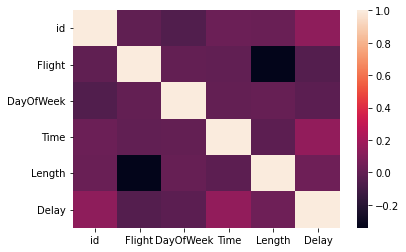

In [ ]:
sns.heatmap(mydata.corr())

In [ ]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [ ]:
#training SVM model with linear kernel
model = SVC(kernel='linear', random_state = 10)
model.fit(X_train, y_train)
#predicting output for test data
pred = model.predict(X_test)
print (pred)

In [ ]:
from sklearn import svm
from sklearn.metrics import hinge_loss
est = svm.LinearSVC()
est.fit(X_train, y_train)
#pred_decision = est.decision_function(X_test)
pred_decision = est.predict(X_test)
#print (hinge_loss(y_test, pred_decision))
#print(pred_decision)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
hinge_loss(y_test, pred_decision)

1.0

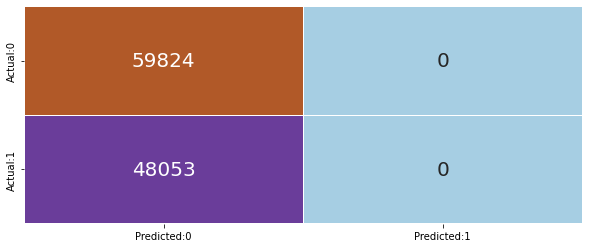

In [ ]:
#building confusion matrix
pred = model.predict(X_test)
cm = confusion_matrix(y_test, pred_decision)
#defining the size of the canvas
plt.rcParams['figure.figsize'] = [10,4]
#confusion matrix to DataFrame
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
#plotting the confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Paired', cbar = False,linewidths = 0.1, annot_kws = {'size':20})
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

In [ ]:
confusion_matrix(y_test, pred_decision)

array([[ 5423, 54401],
       [ 1909, 46144]])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test, pred_decision)   #prints the accuracy score

0.4780166300508913

In [ ]:
print(classification_report(y_test, pred_decision))

              precision    recall  f1-score   support

           0       0.74      0.09      0.16     59824
           1       0.46      0.96      0.62     48053

    accuracy                           0.48    107877
   macro avg       0.60      0.53      0.39    107877
weighted avg       0.61      0.48      0.37    107877



In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, pred, average=None)

array([0.84057971, 0.        ])

In [ ]:
from sklearn.linear_model import LogisticRegression   #imports the LogisticRegression class from the linear_module of the sklearn library
model = LogisticRegression()   #creates an object of the LogisticRegression class and names is model
model.fit(X_train, y_train)   #uses the created object to fit a Logisitc Regression model on the training data

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)   #makes prediction on the out of sample data
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))   #outputs the actual values against the predicted values for easy visual inspection

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score   #imports the confusion matrix and accuracy_score
confusion_matrix(y_test, y_pred)   #outputs the confusion matrix

array([[45668, 14156],
       [32573, 15480]])

In [ ]:
accuracy_score(y_test, y_pred)   #prints the accuracy score

0.5668307424196075

In [ ]:
model.score(X_test,y_test)

0.5668307424196075

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.76      0.66     59824
           1       0.52      0.32      0.40     48053

    accuracy                           0.57    107877
   macro avg       0.55      0.54      0.53    107877
weighted avg       0.56      0.57      0.54    107877

